<a href="https://colab.research.google.com/github/Pabitra-M/DataScience/blob/main/notebooks/eda%20%26%20feature_eng/Ridge%2C_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


**
For Bejaia Region Dataset use 0

For Sidi-Bel Abbes Region Dataset use 1 **

In [8]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df[['Region']] = df[['Region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [11]:
## Remove the null values
df = df.drop(122).reset_index(drop=True)

In [15]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [17]:
df = df.drop(167).reset_index(drop=True)

In [19]:
## fix Spaces
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df = df.dropna().reset_index(drop=True)

In [23]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [28]:
print(df[['month','day','Temperature', 'RH','Ws']].isnull().sum())

month          0
day            0
Temperature    0
RH             0
Ws             0
dtype: int64


In [43]:
df = df.drop(122).reset_index(drop=True)

In [44]:
df[['month','day','Temperature', 'RH','Ws']] = df[['month','day','Temperature', 'RH','Ws']].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int64 
 1   month        242 non-null    int64 
 2   year         242 non-null    object
 3   Temperature  242 non-null    int64 
 4   RH           242 non-null    int64 
 5   Ws           242 non-null    int64 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(6), object(9)
memory usage: 28.5+ KB


In [46]:
df[['year']] = df[['year']].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int64 
 1   month        242 non-null    int64 
 2   year         242 non-null    int64 
 3   Temperature  242 non-null    int64 
 4   RH           242 non-null    int64 
 5   Ws           242 non-null    int64 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.5+ KB


In [49]:
## change other column to float
object = [features for features in df.columns if df[features].dtype == 'O']


In [52]:
for i in object:
  if i != "Classes":
    df[i] = df[i].astype(float)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [55]:
## lets save the cleane dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [64]:
df_copy = df.drop(['day', 'month', 'year'],axis=1)

In [65]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,130
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [67]:
## Encoding catagories classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [68]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [69]:
df_copy['Classes'].value_counts()

,count
Classes,
1,136
0,106


In [71]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


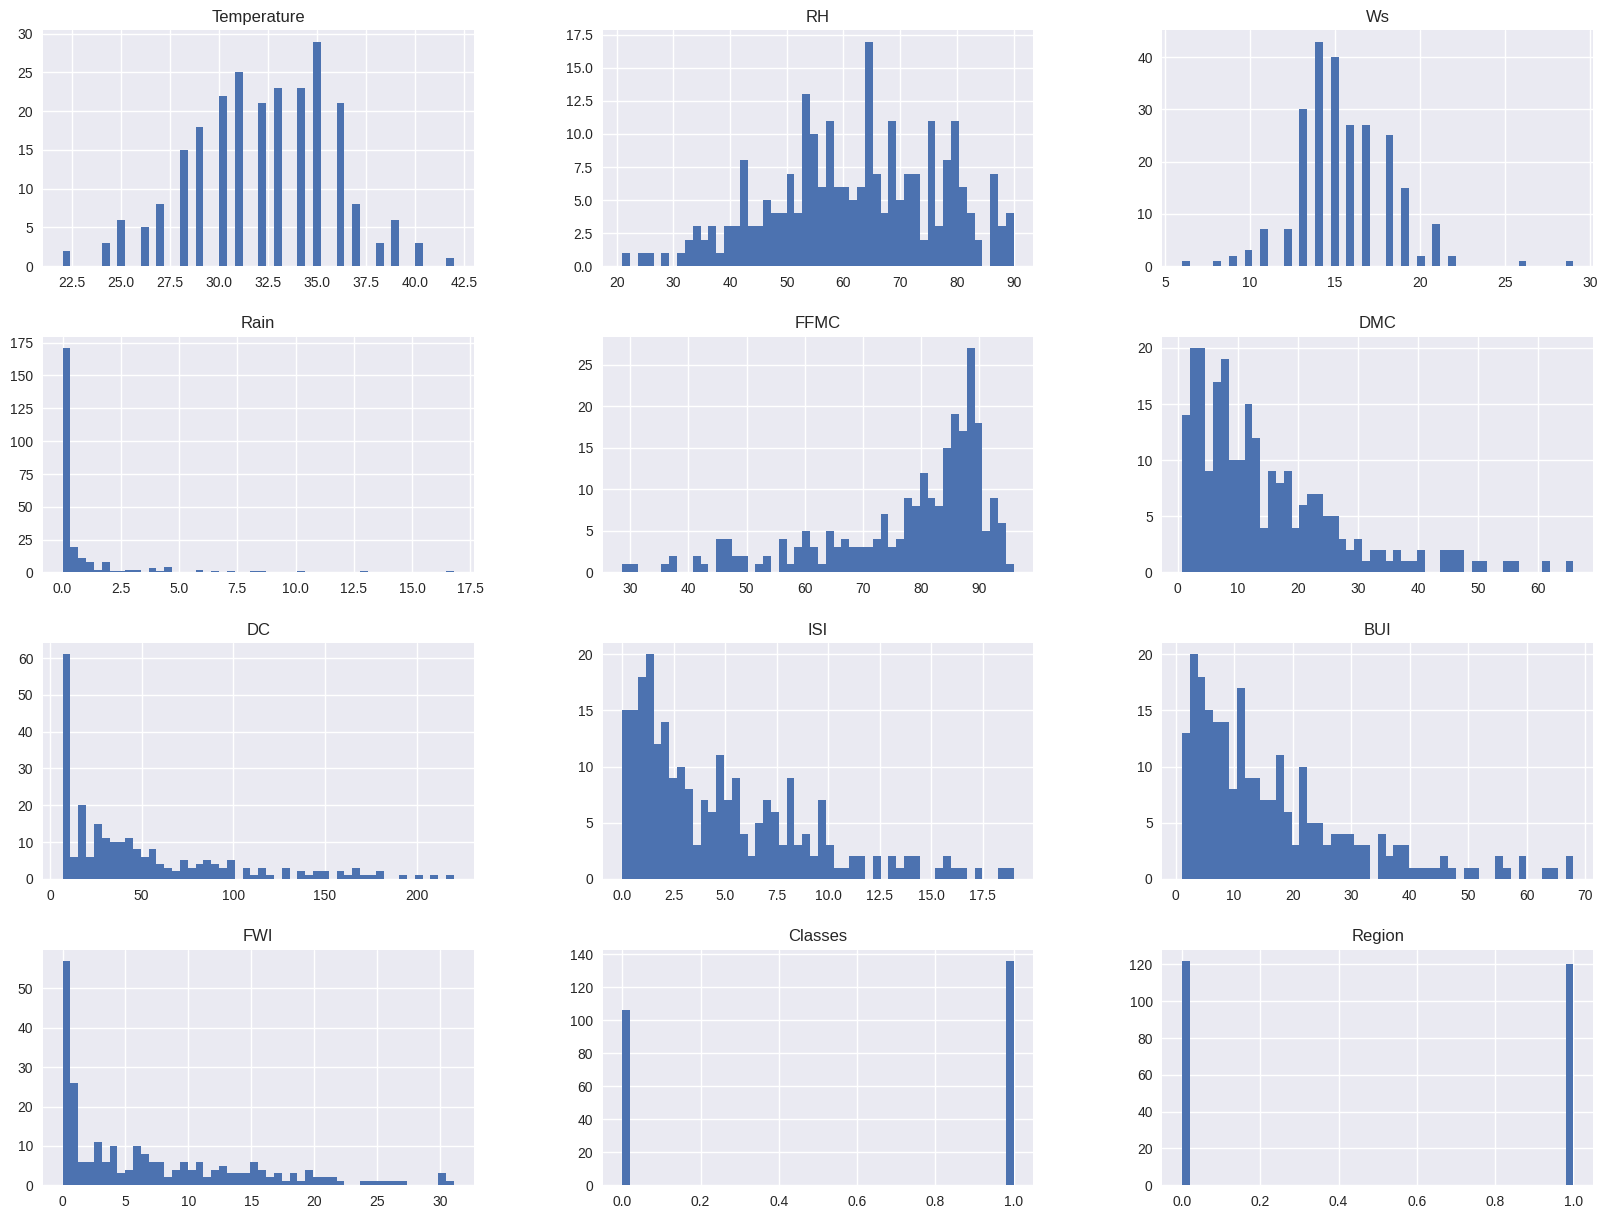

In [74]:
## plot dencity plot for all features
plt.style.use("seaborn-v0_8")
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [79]:
## parcentage for pie Chart
parcentage = df_copy['Classes'].value_counts(normalize=True)*100

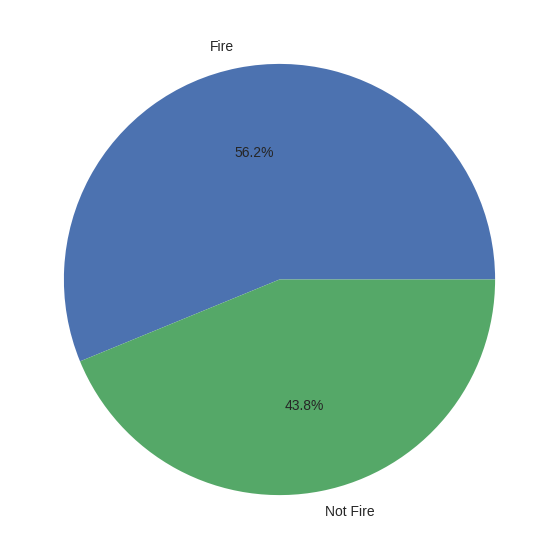

In [80]:
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12, 7))
plt.pie(parcentage, labels=classlabels, autopct='%1.1f%%')
plt.show()

In [81]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651108,-0.285966,-0.325961,0.676160,0.485454,0.377831,0.603820,0.459892,0.566027,0.515262,0.268141
RH,-0.651108,1.000000,0.247429,0.221213,-0.643469,-0.408423,-0.230242,-0.684596,-0.354479,-0.579099,-0.429840,-0.399832
Ws,-0.285966,0.247429,1.000000,0.172507,-0.168882,-0.001317,0.080411,0.005264,0.031300,0.030332,-0.072073,-0.183880
Rain,-0.325961,0.221213,0.172507,1.000000,-0.543554,-0.288479,-0.299128,-0.346830,-0.299833,-0.323624,-0.378429,-0.038521
FFMC,0.676160,-0.643469,-0.168882,-0.543554,1.000000,0.603692,0.510465,0.739147,0.592715,0.690061,0.768749,0.219384
DMC,0.485454,-0.408423,-0.001317,-0.288479,0.603692,1.000000,0.877160,0.682024,0.982326,0.876580,0.585706,0.191403
DC,0.377831,-0.230242,0.080411,-0.299128,0.510465,0.877160,1.000000,0.514563,0.942707,0.743441,0.514182,-0.076729
ISI,0.603820,-0.684596,0.005264,-0.346830,0.739147,0.682024,0.514563,1.000000,0.646617,0.922992,0.734323,0.258753
BUI,0.459892,-0.354479,0.031300,-0.299833,0.592715,0.982326,0.942707,0.646617,1.000000,0.859311,0.587327,0.089300
FWI,0.566027,-0.579099,0.030332,-0.323624,0.690061,0.876580,0.743441,0.922992,0.859311,1.000000,0.718249,0.193921


<Axes: >

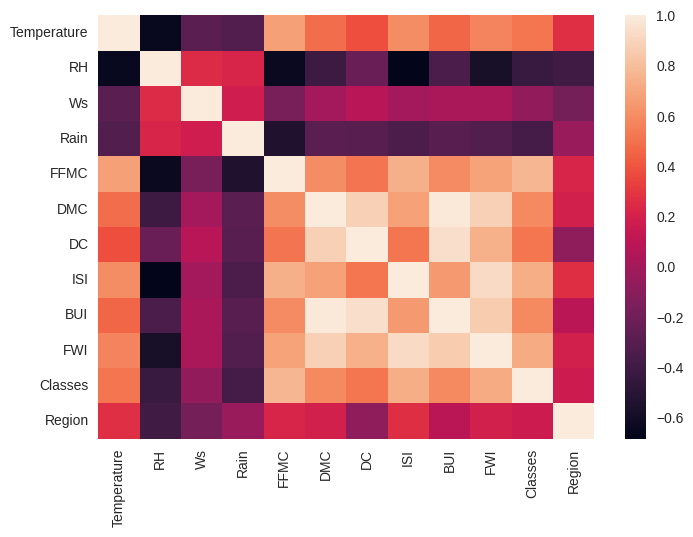

In [84]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

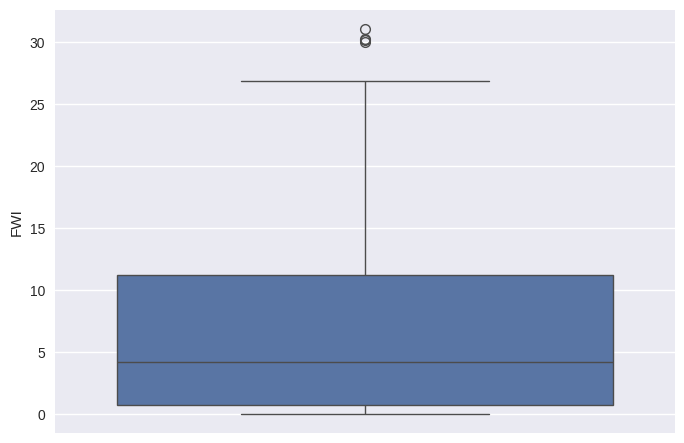

In [86]:
## Box plot
sns.boxplot(df['FWI'])

In [90]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

Text(0.5, 1.0, 'Monthly Fire Analysis of Sidi-Bel')

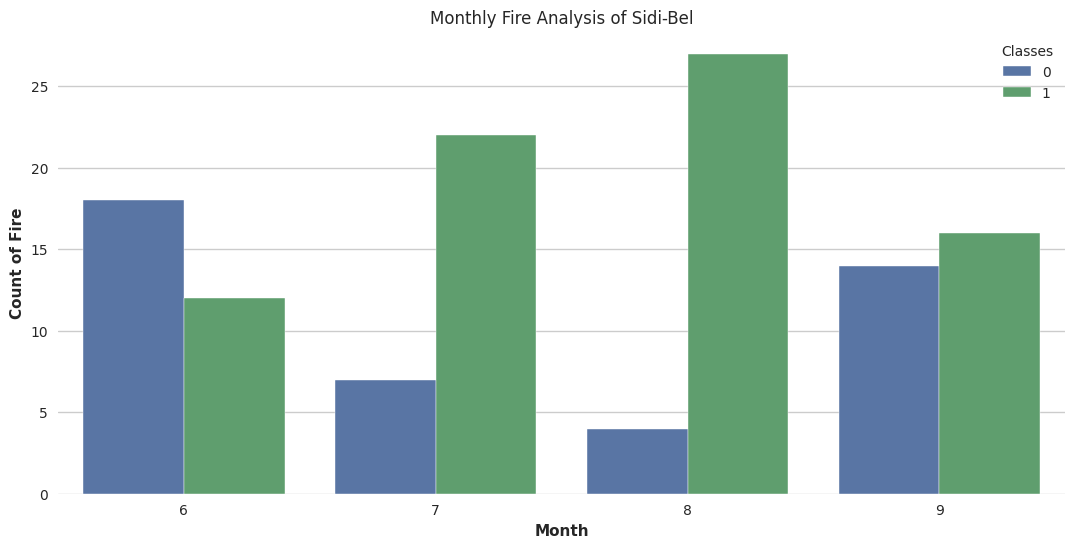

In [97]:
## Monthly fire Analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes', data=dftemp)
plt.xlabel("Month", weight = 'bold')
plt.ylabel("Count of Fire", weight = 'bold')
plt.title("Monthly Fire Analysis of Sidi-Bel")

Text(0.5, 1.0, 'Monthly Fire Analysis of Brjaia')

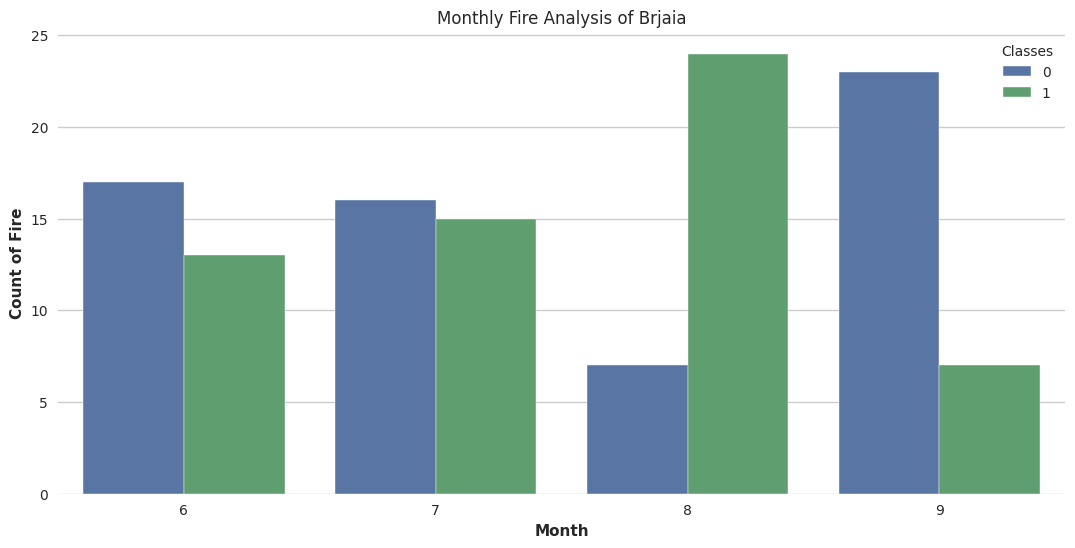

In [98]:
## Monthly fire Analysis
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes', data=dftemp)
plt.xlabel("Month", weight = 'bold')
plt.ylabel("Count of Fire", weight = 'bold')
plt.title("Monthly Fire Analysis of Brjaia")